# Logistic Regression



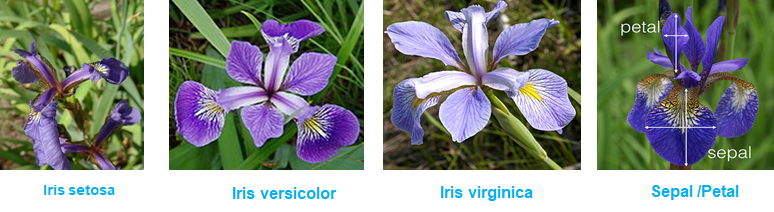

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

## Read the Tranining dataset

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Check basic data quality

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Seprate X and Y (Sepecies)

In [5]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [6]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [8]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Create a pipeline for preprocessing Of X

In [9]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())]).set_output(transform='pandas')

In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Apply train test split

In [13]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest, Ytrain,ytest = train_test_split(X_pre, Y, test_size=.33, random_state=21)

In [14]:
Xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.280340,0.098217,0.649083,0.395774
49,-1.021849,0.558611,-1.340227,-1.315444
65,1.038005,0.098217,0.364896,0.264142
118,2.249683,-1.052767,1.785832,1.448832
55,-0.173674,-0.592373,0.421734,0.132510


In [15]:
Ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [16]:
Xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.052506,-1.052767,0.137547,0.000878
44,-0.900681,1.709595,-1.056039,-1.052180
7,-1.021849,0.788808,-1.283389,-1.315444
21,-0.900681,1.479398,-1.283389,-1.052180
95,-0.173674,-0.131979,0.251221,0.000878


In [17]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


## create a Logistic Regressionn model

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Xtrain,Ytrain)

LogisticRegression()

## Check model accuracy in train and test

In [19]:
model.score(Xtrain,Ytrain)

0.98

In [20]:
model.score(Xtest,ytest)

0.94

## predicting the results

In [21]:
ypred_tr = model.predict(Xtrain)
ypred_ts = model.predict(Xtest)

In [22]:
ypred_tr[0:5]

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [23]:
Ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [24]:
ypred_ts[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [25]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


## Calculating probabilities


In [26]:
yprob_tr = model.predict_proba(Xtrain)
yprob_ts = model.predict_proba(Xtest)

In [27]:
yprob_tr[0:5]

array([[5.80737884e-03, 6.45138135e-01, 3.49054486e-01],
       [9.62785569e-01, 3.72137583e-02, 6.73146323e-07],
       [1.67610228e-02, 8.34067583e-01, 1.49171394e-01],
       [9.22132912e-08, 2.79700806e-03, 9.97202900e-01],
       [2.87506448e-02, 8.34342620e-01, 1.36906735e-01]])

In [28]:
yprob_tr[0]

array([0.00580738, 0.64513813, 0.34905449])

In [29]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [30]:
yprob_ts[0]

array([0.02063496, 0.91298314, 0.0663819 ])

## Evaluating the model

### Confusion matrix for test data

In [31]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

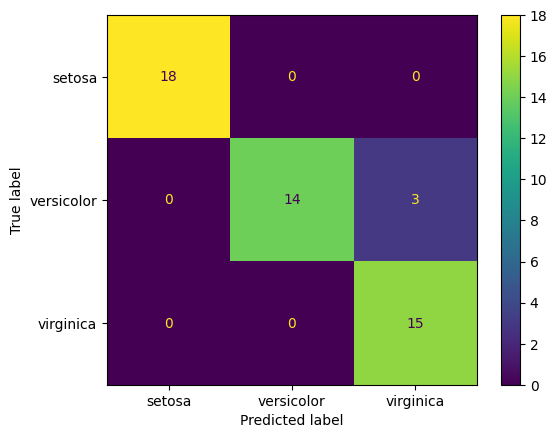

In [32]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()

## Classification report

In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.82      0.90        17
   virginica       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



### Model gives all precision, recall,accuray and f1 score beyond 0.80 Hence this is a good model

### Predicting ot of sample data

In [36]:
Xnew = pd.read_csv('iris_sample.csv')
Xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


## apply pre.transform

In [37]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [38]:
Xnew_pre = num_pipe.transform(Xnew)
Xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


## predict the species

In [39]:
preds = model.predict(Xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

### probablities

In [40]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [41]:
probs = model.predict_proba(Xnew_pre)
probs

array([[1.94050069e-02, 8.82384476e-01, 9.82105171e-02],
       [1.81669512e-04, 6.72987186e-02, 9.32519612e-01],
       [9.77012536e-02, 8.91457274e-01, 1.08414723e-02],
       [7.43177367e-01, 2.56648602e-01, 1.74030989e-04],
       [5.92310057e-03, 3.32280648e-01, 6.61796252e-01],
       [9.63442526e-01, 3.65569693e-02, 5.04873633e-07],
       [1.61079503e-01, 8.11265890e-01, 2.76546072e-02],
       [7.60375074e-04, 1.55517321e-01, 8.43722304e-01],
       [9.85175030e-01, 1.48247641e-02, 2.05885592e-07],
       [8.87613168e-01, 1.12300738e-01, 8.60943583e-05],
       [2.31955647e-02, 8.97183462e-01, 7.96209736e-02],
       [2.64080839e-02, 9.47915023e-01, 2.56768935e-02],
       [3.44535627e-06, 1.34027521e-02, 9.86593803e-01],
       [5.80737884e-03, 6.45138135e-01, 3.49054486e-01],
       [4.96593323e-04, 4.04245547e-01, 5.95257860e-01]])

### Getting max probalities from above

In [42]:
import numpy as np 
max_probs = np.max(probs,axis=1)
max_probs

array([0.88238448, 0.93251961, 0.89145727, 0.74317737, 0.66179625,
       0.96344253, 0.81126589, 0.8437223 , 0.98517503, 0.88761317,
       0.89718346, 0.94791502, 0.9865938 , 0.64513813, 0.59525786])

### Save the above resulte in xnew

In [43]:
Xnew['species_pred'] = preds
Xnew['probability'] = max_probs

In [44]:
Xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,probability
0,5.5,2.5,4.0,1.3,versicolor,0.882384
1,6.9,3.1,5.1,2.3,virginica,0.932520
2,5.1,2.5,3.0,1.1,versicolor,0.891457
3,4.4,2.9,NaN,0.2,setosa,0.743177
4,5.9,3.0,5.1,1.8,virginica,0.661796
5,5.5,3.5,1.3,0.2,setosa,0.963443
6,5.6,NaN,3.6,1.3,versicolor,0.811266
7,6.5,3.0,5.2,2.0,virginica,0.843722
8,5.3,3.7,1.5,0.2,setosa,0.985175
9,5.1,3.4,1.5,NaN,setosa,0.887613


## save the file to results.csv

In [45]:
Xnew.to_csv('reults.csv', index=False)